In [1]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(1)

In [23]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [24]:
class Data2D(Dataset):

    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1, 0.1)
        self.x[:, 1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
         return self.len

In [25]:
dataset = Data2D()

In [26]:
class linearRegression(nn.Module):
    def __init__(self, inputsize, outputsize):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(inputsize, outputsize)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [27]:
lr = linearRegression(2,1)
print(list(lr.parameters()))

[Parameter containing:
tensor([[-0.6549,  0.3559]], requires_grad=True), Parameter containing:
tensor([-0.4972], requires_grad=True)]


In [28]:
optimizer = optim.SGD(lr.parameters(), lr = 0.1)

In [29]:
criterion = nn.MSELoss()

In [32]:
trainLoader = DataLoader(dataset=dataset, batch_size=3)

Before Training: 


/var/folders/x3/d9wqpd_j1mz8xzmnqzq0z_vr0000gn/T/ipykernel_35863/1843498570.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


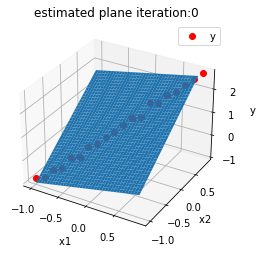

After Training: 


/var/folders/x3/d9wqpd_j1mz8xzmnqzq0z_vr0000gn/T/ipykernel_35863/1843498570.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


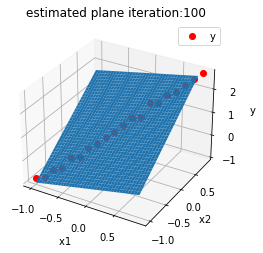

In [33]:
LOSS = []
print("Before Training: ")
Plot_2D_Plane(lr, dataset)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainLoader:
            yhat = lr(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(lr, dataset, epochs)

In [35]:
model1 = linearRegression(2,1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)

In [36]:
dataloader = DataLoader(dataset = dataset, batch_size=30)

In [37]:
LOSS1 = []
def training(iter):
    for epoch in range(iter):
        for x, y in dataloader:
            yhat = model1(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS1.append(loss.item())

In [38]:
training(100)

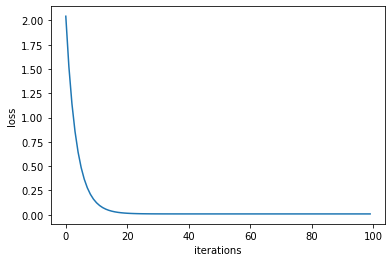

In [40]:
plt.plot(LOSS1)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()